<a href="https://colab.research.google.com/github/HSChoo/test1/blob/main/LOGO_Yolo_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#roboflow data 사용
!curl -L -o robo.zip https://app.roboflow.com/ds/zW9DIeMsqX?key=tkuuiRDujl
#"roboflow data"를 사용하여 데이터를 다운로드하는 명령어입니다.
#curl을 사용하여 roboflow.com에서 데이터셋을 다운로드하고, 해당 데이터셋의 키를 사용하여 다운로드합니다.
#다운로드된 데이터는 "robo.zip" 파일로 저장됩니다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0    609      0  0:00:01  0:00:01 --:--:--   609
100 17.7M  100 17.7M    0     0   9.9M      0  0:00:01  0:00:01 --:--:--  9.9M


In [2]:
!mkdir dataset
#"dataset"이라는 디렉토리를 생성하는 명령어입니다.
#이 디렉토리는 데이터셋을 저장하기 위한 폴더로 사용될 수 있습니다.

In [3]:
!mv robo.zip ./dataset
#"robo.zip" 파일을 "dataset" 디렉토리로 이동시키는 명령어입니다.
#다운로드한 데이터셋 파일이 "dataset" 디렉토리 안에 저장됩니다.

In [4]:
%cd dataset
!unzip -oq robo.zip
#"dataset" 디렉토리로 이동한 후에 "robo.zip" 파일을 압축 해제하는 명령어입니다.
#"robo.zip" 파일의 내용이 "dataset" 디렉토리에 압축 해제됩니다.

/content/dataset


In [5]:
# Yolov5 환경설정
# 초기화
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
#"/content" 디렉토리로 이동한 후에 "yolov5"라는 이름으로 GitHub 저장소를 복제하는 명령어입니다.
#"yolov5" 프로젝트가 "/content" 디렉토리에 복제됩니다.

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15927, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 15927 (delta 20), reused 26 (delta 9), pack-reused 15880
Receiving objects: 100% (15927/15927), 14.60 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (10919/10919), done.


In [6]:
%cd /content/yolov5/
!pip install -r requirements.txt
#"/content/yolov5/" 디렉토리로 이동한 후에 "requirements.txt" 파일에 명시된 필수 패키지들을 설치하는 명령어입니다.
#필요한 패키지들이 설치되어 프로젝트를 실행할 수 있게 됩니다.

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [7]:
!pwd
#현재 작업 디렉토리를 출력하는 명령어입니다.

/content/yolov5


In [8]:
%cat /content/dataset/data.yaml
#"/content/dataset/data.yaml" 파일의 내용을 출력하는 명령어입니다.
#해당 파일의 내용이 출력됩니다.

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['NG_L', 'NG_R', 'OK_L', 'OK_R']

roboflow:
  workspace: hs-esyhr
  project: logo4-yuhxx
  version: 14
  license: CC BY 4.0
  url: https://universe.roboflow.com/hs-esyhr/logo4-yuhxx/dataset/14

In [9]:
%cd /
from glob import glob
train_img_list = glob('/content/dataset/train/images/*.jpg')
val_img_list = glob('/content/dataset/valid/images/*.jpg')
print(len(train_img_list)), print(len(val_img_list))
#현재 작업 디렉토리를 루트 디렉토리로 변경합니다.
#glob 모듈을 사용하여 '/content/dataset/train/images/*.jpg' 경로에 해당하는 모든 jpg 파일의 리스트를 가져옵니다.
#glob 모듈을 사용하여 '/content/dataset/valid/images/*.jpg' 경로에 해당하는 모든 jpg 파일의 리스트를 가져옵니다.
#train_img_list의 길이를 출력합니다.
#val_img_list의 길이를 출력합니다.

/
210
20


(None, None)

In [10]:
train_img_list[:3]
#train_img_list의 처음 3개의 요소가 출력됩니다.

['/content/dataset/train/images/OK_10_png.rf.b236e4abee69b60aed5f1d05cb9b15a0.jpg',
 '/content/dataset/train/images/OK_10_png.rf.e4f16c011ee5c500f2af37777c9bef2b.jpg',
 '/content/dataset/train/images/OK_29_png.rf.85f62964f22099442f0a434fbbd5e91d.jpg']

In [11]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')
#'/content/dataset/train.txt' 파일을 쓰기 모드로 엽니다.
#train_img_list의 모든 요소를 개행문자('\n')로 구분하여 문자열로 변환한 후, 파일에 씁니다.
#'/content/dataset/val.txt' 파일을 쓰기 모드로 엽니다.
#val_img_list의 모든 요소를 개행문자('\n')로 구분하여 문자열로 변환한 후, 파일에 씁니다.
#train_img_list의 요소들이 'train.txt' 파일에, val_img_list의 요소들이 'val.txt' 파일에 저장됩니다.

In [12]:
!head -5 /content/dataset/train.txt
#'train.txt' 파일의 처음 5줄이 출력됩니다.

/content/dataset/train/images/OK_10_png.rf.b236e4abee69b60aed5f1d05cb9b15a0.jpg
/content/dataset/train/images/OK_10_png.rf.e4f16c011ee5c500f2af37777c9bef2b.jpg
/content/dataset/train/images/OK_29_png.rf.85f62964f22099442f0a434fbbd5e91d.jpg
/content/dataset/train/images/OK_3_png.rf.bbc2035d2c4b6fcc44d002c0321ffce9.jpg
/content/dataset/train/images/OK_7_png.rf.da35ab4be1a6acd6298460aeb90cd09f.jpg


In [13]:
#yaml 파일 업데이트
import yaml
with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)
print(data)
#'data.yaml' 파일을 읽기 모드로 엽니다.
#yaml.safe_load() 함수를 사용하여 파일의 내용을 파싱하여 data 변수에 저장합니다.
#data 변수를 출력합니다.
#'data.yaml' 파일의 내용이 파싱되어 data 변수에 저장되고, 그 값을 출력합니다.

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 4, 'names': ['NG_L', 'NG_R', 'OK_L', 'OK_R'], 'roboflow': {'workspace': 'hs-esyhr', 'project': 'logo4-yuhxx', 'version': 14, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/hs-esyhr/logo4-yuhxx/dataset/14'}}


In [14]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'
with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)
print(data)
#data 딕셔너리에 'train' 키와 '/content/dataset/train.txt' 값을 추가합니다.
#data 딕셔너리에 'val' 키와 '/content/dataset/val.txt' 값을 추가합니다.
#'data.yaml' 파일을 쓰기 모드로 엽니다.
#yaml.dump() 함수를 사용하여 data 딕셔너리를 YAML 형식으로 직렬화하여 파일에 저장합니다.
#data 딕셔너리를 출력합니다.
#data 딕셔너리에 'train'과 'val' 키가 추가되고, 'data.yaml' 파일에 해당 내용이 저장됩니다.
#마지막으로 data 딕셔너리를 출력합니다.

{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'test': '../test/images', 'nc': 4, 'names': ['NG_L', 'NG_R', 'OK_L', 'OK_R'], 'roboflow': {'workspace': 'hs-esyhr', 'project': 'logo4-yuhxx', 'version': 14, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/hs-esyhr/logo4-yuhxx/dataset/14'}}


In [15]:
%cat /content/dataset/data.yaml
#%cat은 주피터 노트북에서 사용되는 명령어로, 해당 경로의 파일을 출력하는 명령입니다.

names:
- NG_L
- NG_R
- OK_L
- OK_R
nc: 4
roboflow:
  license: CC BY 4.0
  project: logo4-yuhxx
  url: https://universe.roboflow.com/hs-esyhr/logo4-yuhxx/dataset/14
  version: 14
  workspace: hs-esyhr
test: ../test/images
train: /content/dataset/train.txt
val: /content/dataset/val.txt


In [16]:
!cat /content/yolov5/models/yolov5s.yaml
#!cat은 주피터 노트북에서 사용되는 명령어로, 해당 경로의 파일을 출력하는 명령입니다.

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [17]:
# 10회 반복학습 실시
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 10 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results
#YOLOv5를 사용하여 gun_yolov5s_results라는 이름으로 10 에포크 동안 학습을 수행하는 명령입니다.
#%cd /content/yolov5/는 현재 작업 디렉토리를 /content/yolov5/로 변경하는 명령입니다.
#!python train.py는 YOLOv5의 train.py 스크립트를 실행하여 다음과 같은 옵션으로 학습을 수행하는 명령입니다:
#--img 416: 입력 이미지의 크기를 416x416으로 설정합니다.
#--batch 16: 배치 크기를 16으로 설정합니다.
#--epochs 10: 10 에포크 동안 학습을 수행합니다.
#--data /content/dataset/data.yaml: 데이터셋 구성을 정의하는 YAML 파일의 경로를 지정합니다.
#--cfg ./models/yolov5s.yaml: 모델 구조를 정의하는 YAML 파일의 경로를 지정합니다.
#--weights yolov5s.pt: 사전 학습된 가중치 파일의 경로를 지정합니다.
#--name gun_yolov5s_results: 학습 결과를 저장할 디렉토리의 이름을 지정합니다.
#YOLOv5 모델이 주어진 데이터셋을 사용하여 학습을 수행하고, gun_yolov5s_results라는 이름의 디렉토리에 학습 결과가 저장됩니다.

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [18]:
#결과보기 : tensorboard #10회반복
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/
#TensorBoard를 사용하여 /content/yolov5/runs/ 디렉토리에 저장된 로그 파일을 시각화하는 명령입니다.
#%load_ext tensorboard는 주피터 노트북에서 TensorBoard를 로드하는 명령입니다.
#%tensorboard --logdir /content/yolov5/runs/는 TensorBoard를 실행하여 /content/yolov5/runs/ 디렉토리에 저장된 로그 파일을 시각화합니다.
#TensorBoard가 실행되고, 해당 디렉토리에 저장된 로그 파일의 시각화 결과를 볼 수 있습니다.

<IPython.core.display.Javascript object>

In [19]:
from IPython.display import Image
import os
val_img_path = val_img_list[3]
val_img_path
#주어진 코드는 IPython.display 모듈에서 Image 클래스를 가져와서 사용하고,
#os 모듈을 가져온 후 val_img_list에서 3번째 이미지 경로를 val_img_path 변수에 할당하는 코드입니다.
#from IPython.display import Image은 IPython 환경에서 이미지를 표시하기 위해 Image 클래스를 가져오는 명령입니다.
#import os는 파일 및 디렉토리 관련 작업을 위해 os 모듈을 가져오는 명령입니다.
#val_img_path = val_img_list[3]는 val_img_list에서 3번째 이미지 경로를 val_img_path 변수에 할당하는 명령입니다.
#위 코드를 실행하면 val_img_list에서 3번째 이미지의 경로가 val_img_path 변수에 저장됩니다.

'/content/dataset/valid/images/OK_37_png.rf.0916389045602e4b9bb196c28fe69362.jpg'

In [20]:
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.6 --save-txt --save-crop --save-conf --source /content/dataset/valid/images
#주어진 명령어는 detect.py 스크립트를 실행하여 이미지에서 물체를 감지하는 명령입니다.
#!python detect.py는 detect.py 스크립트를 파이썬으로 실행하는 명령입니다.
#--weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt는 사용할 가중치 파일의 경로를 지정하는 옵션입니다.
#--img 416는 입력 이미지의 크기를 416x416으로 설정하는 옵션입니다.
#--conf 0.6은 감지된 물체의 신뢰도 임계값을 0.6으로 설정하는 옵션입니다.
#--save-txt는 감지된 물체의 좌표를 텍스트 파일로 저장하는 옵션입니다.
#--save-crop는 감지된 물체를 잘라내어 이미지 파일로 저장하는 옵션입니다.
#--save-conf는 감지된 물체의 신뢰도를 이미지 파일에 표시하는 옵션입니다.
#--source /content/dataset/valid/images는 입력 이미지의 경로를 지정하는 옵션입니다.
#위 명령을 실행하면 detect.py 스크립트가 실행되고, 지정된 가중치 파일과 입력 이미지를 사용하여 물체를 감지합니다.
#감지된 물체의 좌표는 텍스트 파일로 저장되고, 잘라낸 이미지와 신뢰도가 표시된 이미지도 저장됩니다.
#입력 이미지는 /content/dataset/valid/images 디렉토리에서 가져옵니다.

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/dataset/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/dataset/valid/images/NG_11_png.rf.577106dbf30c0b7bb4f712f184a9b699.jpg: 416x416 1 NG_L, 7.4ms
image 2/20 /content/dataset/valid/images/NG_16_png.rf.d8e0cf5e259cb2b420f6872f2020af2b.jpg: 416x416 (no detections), 7.4ms
image 3/20 /content/dataset/valid/images/NG_18_png.rf.ddee513a2d7132c

In [21]:
!python detect.py --weights /content/drive/MyDrive/1backup/best.pt --img 416 --conf 0.6 --save-txt --save-crop --save-conf --source val_img_list[9]
#주어진 명령어는 detect.py 스크립트를 실행하여 이미지에서 물체를 감지하는 명령입니다.
#!python detect.py는 detect.py 스크립트를 파이썬으로 실행하는 명령입니다.
#--weights /content/drive/MyDrive/1backup/best.pt는 사용할 가중치 파일의 경로를 지정하는 옵션입니다.
#--img 416는 입력 이미지의 크기를 416x416으로 설정하는 옵션입니다.
#--conf 0.6은 감지된 물체의 신뢰도 임계값을 0.6으로 설정하는 옵션입니다.
#--save-txt는 감지된 물체의 좌표를 텍스트 파일로 저장하는 옵션입니다.
#--save-crop는 감지된 물체를 잘라내어 이미지 파일로 저장하는 옵션입니다.
#--save-conf는 감지된 물체의 신뢰도를 이미지 파일에 표시하는 옵션입니다.
#--source val_img_list[29]는 입력 이미지의 경로를 val_img_list의 29번째 이미지로 지정하는 옵션입니다.
#위 명령을 실행하면 detect.py 스크립트가 실행되고, 지정된 가중치 파일과 입력 이미지를 사용하여 물체를 감지합니다.
#감지된 물체의 좌표는 텍스트 파일로 저장되고, 잘라낸 이미지와 신뢰도가 표시된 이미지도 저장됩니다.
#입력 이미지는 val_img_list의 29번째 이미지로 지정됩니다.

detect: weights=['/content/drive/MyDrive/1backup/best.pt'], source=val_img_list[9], data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 262, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 257, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 99, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn

In [22]:
val_img_list[4]
#val_img_list[4]는 변수나 리스트의 인덱스를 나타내는 표현입니다.
#따라서 val_img_list라는 리스트에서 4번째 요소를 의미합니다.

'/content/dataset/valid/images/NG_47_png.rf.7c06c9023854e84f00c2bcb59c1355ec.jpg'

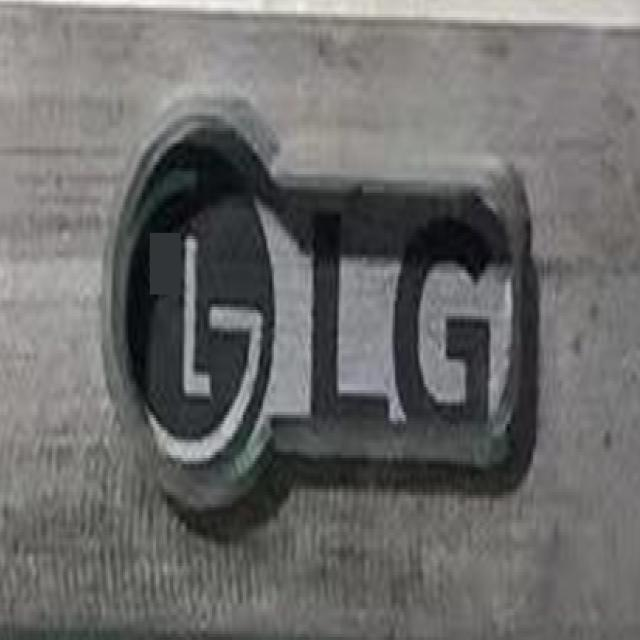

In [23]:
val_img_path = val_img_list[4]
img_file = os.path.join('/content/dataset/valid/images/', os.path.basename(val_img_path))
Image(img_file)
#val_img_list[4]는 val_img_list 리스트에서 4번째 요소를 의미합니다. 이 요소는 val_img_path 변수에 저장됩니다.
#그 다음, img_file 변수는 val_img_path를 기반으로 생성됩니다.
#os.path.basename(val_img_path)는 val_img_path의 파일 이름 부분을 추출하는 것을 의미합니다.
#그리고 '/content/dataset/valid/images/'와 결합하여 이미지 파일의 전체 경로를 생성합니다.
#마지막으로, Image(img_file)는 img_file 경로에 있는 이미지를 로드하여 보여줍니다.

In [24]:
img_file
#이미지 파일의 전체 경로를 나타냅니다

'/content/dataset/valid/images/NG_47_png.rf.7c06c9023854e84f00c2bcb59c1355ec.jpg'

In [25]:
!python detect.py --weights /content/drive/MyDrive/1backup/best.pt --img 416 --conf 0.6 --save-txt --save-crop --save-conf --source {img_file}
#detect.py 스크립트를 실행하여 객체 감지를 수행하는 명령어입니다.
#--weights: 객체 감지에 사용할 모델의 가중치 파일 경로를 지정합니다.
#--img: 입력 이미지의 크기를 지정합니다.
#--conf: 객체를 감지하기 위한 최소 신뢰도(confidence) 임계값을 지정합니다.
#--save-txt: 객체 감지 결과를 텍스트 파일로 저장할지 여부를 지정합니다.
#--save-crop: 객체 감지된 영역을 잘라내어 저장할지 여부를 지정합니다.
#--save-conf: 객체 감지 결과의 신뢰도를 저장할지 여부를 지정합니다.
#--source: 객체 감지를 수행할 이미지 파일의 경로를 지정합니다.
#{img_file} 변수를 사용하여 동적으로 이미지 파일 경로를 지정하고 있습니다.
#img_file 변수에는 객체 감지를 수행할 이미지 파일의 전체 경로가 들어가야 합니다.

detect: weights=['/content/drive/MyDrive/1backup/best.pt'], source=/content/dataset/valid/images/NG_47_png.rf.7c06c9023854e84f00c2bcb59c1355ec.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 262, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 257, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 99, in ru

In [26]:
output = '/content/dataset/valid/images/OK_11_png.rf.c06d70475ce8ea9bbfa5513b1f140669.jpg'
Image(output)
#주어진 코드는 output 변수에 저장된 이미지 파일을 로드하여 출력하는 것입니다.
#Image 클래스는 이미지 파일을 로드하고 표시하는 데 사용됩니다.
#output 변수에 저장된 이미지 파일이 로드되어 출력됩니다.

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [27]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results
#주어진 코드는 yolov5 디렉토리로 이동한 후, train.py 스크립트를 실행하여 객체 감지 모델을 학습하는 명령어입니다.
#--img: 입력 이미지의 크기를 지정합니다.
#--batch: 학습에 사용할 배치 크기를 지정합니다.
#--epochs: 학습할 에폭(epoch) 수를 지정합니다.
#--data: 데이터셋에 대한 YAML 파일의 경로를 지정합니다.
#--cfg: 모델 구성 파일의 경로를 지정합니다.
#--weights: 사전 학습된 모델의 가중치 파일 경로를 지정합니다.
#--name: 학습 결과를 저장할 디렉토리 이름을 지정합니다.
#yolov5 디렉토리로 이동한 후, 주어진 옵션과 함께 train.py 스크립트를 실행하여 객체 감지 모델을 학습할 수 있습니다.

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

In [28]:
#결과보기 : tensorboard
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/
#주어진 코드는 tensorboard를 사용하여 학습 로그를 시각화하는 명령어입니다.
#tensorboard를 활성화
#--logdir 옵션을 사용하여 로그 파일이 있는 디렉토리 경로를 지정합니다.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [29]:
from IPython.display import Image
import os
val_img_path = val_img_list[3]
val_img_path
#주어진 코드는 IPython.display 모듈에서 Image 클래스를 가져오고,
#os 모듈을 가져온 후, val_img_list에서 4번째 이미지 경로를 val_img_path 변수에 저장하는 것입니다.
#val_img_list는 이미지 파일 경로의 리스트로 가정되며, 여기서 4번째 이미지 경로를 val_img_path 변수에 저장합니다.
#이후 val_img_path를 출력합니다.

'/content/dataset/valid/images/OK_37_png.rf.0916389045602e4b9bb196c28fe69362.jpg'

In [30]:
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt --img 416 --conf 0.6 --save-txt --save-crop --save-conf --source /content/dataset/valid/images
#주어진 코드는 detect.py 스크립트를 사용하여 이미지에서 물체를 감지하는 명령어입니다.
#--weights 옵션은 학습된 모델의 가중치 파일 경로를 지정합니다.
#--img 옵션은 입력 이미지의 크기를 지정합니다.
#--conf 옵션은 감지 임계값을 지정합니다.
#--save-txt, --save-crop, --save-conf 옵션은 각각 감지된 물체의 좌표를 텍스트 파일로 저장하고, 감지된 물체를 잘라내어 저장하며, 감지된 물체의 신뢰도를 저장하는 옵션입니다.
#--source 옵션은 입력 이미지의 경로를 지정합니다.
#/content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt 가중치를 사용하여 크기가 416인 이미지에서 물체를 감지하고,
#감지된 결과를 텍스트 파일과 잘라낸 이미지로 저장하며, 감지된 물체의 신뢰도를 저장합니다.
#입력 이미지는 /content/dataset/valid/images 경로에 있습니다.

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt'], source=/content/dataset/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/dataset/valid/images/NG_11_png.rf.577106dbf30c0b7bb4f712f184a9b699.jpg: 416x416 (no detections), 7.4ms
image 2/20 /content/dataset/valid/images/NG_16_png.rf.d8e0cf5e259cb2b420f6872f2020af2b.jpg: 416x416 (no detections), 7.4ms
image 3/20 /content/dataset/valid/images/NG_18_png.rf.ddee5

In [31]:
val_img_list[3]
#val_img_list라는 리스트에서 인덱스 3에 해당하는 요소를 가져오는 것

'/content/dataset/valid/images/OK_37_png.rf.0916389045602e4b9bb196c28fe69362.jpg'

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt --img 416 --conf 0.6 --save-txt --save-crop --save-conf --source {img_file}
#주어진 코드는 detect.py 스크립트를 사용하여 이미지에서 물체를 감지하는 명령어입니다.
#--weights 옵션은 학습된 모델의 가중치 파일 경로를 지정합니다.
#--img 옵션은 입력 이미지의 크기를 지정합니다.
#--conf 옵션은 감지 임계값을 지정합니다.
#--save-txt, --save-crop, --save-conf 옵션은 각각 감지된 물체의 좌표를 텍스트 파일로 저장하고, 감지된 물체를 잘라내어 저장하며, 감지된 물체의 신뢰도를 저장하는 옵션입니다.
#--source 옵션은 입력 이미지의 경로를 지정합니다.
#{img_file}은 변수나 파일 경로를 나타내는 것으로 추정됩니다. 실제로 사용할 때는 해당 변수나 파일 경로로 대체되어야 합니다.
#/content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt 가중치를 사용하여 크기가 416인 이미지에서 물체를 감지하고,
#감지된 결과를 텍스트 파일과 잘라낸 이미지로 저장하며, 감지된 물체의 신뢰도를 저장합니다.
#입력 이미지는 {img_file} 경로에 있어야 합니다.

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results2/weights/best.pt'], source=/content/dataset/valid/images/NG_47_png.rf.7c06c9023854e84f00c2bcb59c1355ec.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 


In [ ]:
output = '/content/yolov5/runs/detect/exp4/OK_11_png.rf.c06d70475ce8ea9bbfa5513b1f140669.jpg'
Image(output)
#output 변수에 저장된 이미지 파일을 로드하여 출력하는 것입니다.
#Image(output)는 PIL 라이브러리의 Image 클래스를 사용하여 해당 이미지 파일을 로드하고 출력하는 것입니다.